In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.feature_selection import SelectPercentile, f_classif

import random

In [2]:
df = pd.read_csv(r'D:\ML Assignment 3\df_out.csv', index_col = 0)
pd.set_option('display.max_rows', None)
percentiles = [1, 5, 10]

In [3]:
def classifying1(x):
    if x > 1: 
        return 1
    else:
        return 0

In [4]:
def preprocess_percentile(X_train, X_test, y_train, y_label, per=10):
    selector = SelectPercentile(f_classif, percentile=per)
    selector.fit(X_train, y_train)
    features_train_transformed = selector.transform(X_train)
    features_test_transformed  = selector.transform(X_test)

    return features_train_transformed, features_test_transformed, y_train, y_label

In [5]:
df["classes"] = df['2015 PRICE VAR [%]'].apply(classifying1)
df.corrwith(df["2015 PRICE VAR [%]"]).sort_values(ascending = False)

2015 PRICE VAR [%]                 1.000000
Class                              0.652077
classes                            0.651469
EPS Diluted                        0.118955
EPS                                0.117757
Free Cash Flow per Share           0.113474
freeCashFlowPerShare               0.112033
Gross Margin                       0.097719
Capex per Share                    0.091541
Net Income per Share               0.090849
ROE                                0.075625
returnOnEquity                     0.074910
Capital Expenditure                0.066873
Earnings Yield                     0.059948
Capex to Depreciation              0.049635
Earnings Before Tax Margin         0.048110
Free Cash Flow margin              0.046746
Net Profit Margin                  0.046680
EBIT Growth                        0.045174
EBIT Margin                        0.044077
Profit Margin                      0.035585
Investing Cash flow                0.030782
EBITDA Margin                   

In [6]:
df = df.drop(columns=['2015 PRICE VAR [%]','Class', 'Sector'])
nparray = df.to_numpy()
scores = ["recall",'precision','accuracy','f1']

In [7]:
features = nparray[:,0:-1]
label = nparray[:,-1]

X = features
y = label

features.shape

(3788, 61)

In [8]:
resultsDF = pd.DataFrame([], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

# SVC Linear

In [17]:
resultsDF = pd.DataFrame([], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')
for i in range (0,3):  
    for p in percentiles:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)   
            X_train, X_test, y_train, y_test = preprocess_percentile(X_train, X_test, y_train, y_test, p)
            param_grid = {'C': [0.1,0.5,0.7, 0.9,1,2,10,15,20], 'dual': [False]}
            SVC_GS = GridSearchCV(LinearSVC(),scoring = score, param_grid = param_grid , cv = 30,refit=True,verbose=1, n_jobs=-1)
            SVC_GS.fit(X_train,y_train)   
            y_pred = SVC_GS.predict(X_test)
            resultsSVM1 = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsSVM1.insert(0,'SVMLinear RUN ' + str(i+1) + " percentile=" + str(p) +   " With Scoring method " + score + " : ")
            resultsSVM1.pop(4)
            resultsSVM1.insert(4, SVC_GS.score(X_train, y_train))
            resultsSVM1.insert(5, SVC_GS.score(X_test, y_test))


            SVM1_dataframe = pd.DataFrame([resultsSVM1], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([SVM1_dataframe])
            print("The best estimator for RUN " + str(i+1) + " percentile=" + str(p) + " "+  " With Scoring method " + score + " : "  + str(SVC_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + "percentile=" + str(p) +  " With Scoring method " + score + " : "   + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))
    

Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=1  With Scoring method recall : LinearSVC(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=1 With Scoring method recall :  is 

[[[ 73 239]
  [ 78 368]]

 [[368  78]
  [239  73]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=1  With Scoring method precision : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=1 With Scoring method precision :  is 

[[[ 80 262]
  [ 41 375]]

 [[375  41]
  [262  80]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=1  With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=1 With Scoring method accuracy :  is 

[[[ 78 218]
  [ 77 385]]

 [[385  77]
  [218  78]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=1  With Scoring method f1 : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=1 With Scoring method f1 :  is 

[[[ 72 256]
  [ 58 372]]

 [[372  58]
  [256  72]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=5  With Scoring method recall : LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=5 With Scoring method recall :  is 

[[[ 75 246]
  [ 56 381]]

 [[381  56]
  [246  75]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=5  With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=5 With Scoring method precision :  is 

[[[ 71 238]
  [ 46 403]]

 [[403  46]
  [238  71]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=5  With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=5 With Scoring method accuracy :  is 

[[[ 60 247]
  [ 40 411]]

 [[411  40]
  [247  60]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=5  With Scoring method f1 : LinearSVC(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=5 With Scoring method f1 :  is 

[[[ 74 217]
  [ 72 395]]

 [[395  72]
  [217  74]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=10  With Scoring method recall : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=10 With Scoring method recall :  is 

[[[ 72 238]
  [ 45 403]]

 [[403  45]
  [238  72]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=10  With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=10 With Scoring method precision :  is 

[[[ 77 223]
  [ 65 393]]

 [[393  65]
  [223  77]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=10  With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=10 With Scoring method accuracy :  is 

[[[ 78 218]
  [ 58 404]]

 [[404  58]
  [218  78]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=10  With Scoring method f1 : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN1percentile=10 With Scoring method f1 :  is 

[[[ 70 230]
  [ 46 412]]

 [[412  46]
  [230  70]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=1  With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=1 With Scoring method recall :  is 

[[[ 74 250]
  [ 70 364]]

 [[364  70]
  [250  74]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=1  With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=1 With Scoring method precision :  is 

[[[ 80 225]
  [ 69 384]]

 [[384  69]
  [225  80]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=1  With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=1 With Scoring method accuracy :  is 

[[[ 69 247]
  [ 69 373]]

 [[373  69]
  [247  69]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=1  With Scoring method f1 : LinearSVC(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=1 With Scoring method f1 :  is 

[[[ 78 222]
  [ 56 402]]

 [[402  56]
  [222  78]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=5  With Scoring method recall : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=5 With Scoring method recall :  is 

[[[ 66 256]
  [ 50 386]]

 [[386  50]
  [256  66]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=5  With Scoring method precision : LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=5 With Scoring method precision :  is 

[[[ 80 234]
  [ 69 375]]

 [[375  69]
  [234  80]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=5  With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=5 With Scoring method accuracy :  is 

[[[ 83 223]
  [ 74 378]]

 [[378  74]
  [223  83]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=5  With Scoring method f1 : LinearSVC(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=5 With Scoring method f1 :  is 

[[[ 77 255]
  [ 46 380]]

 [[380  46]
  [255  77]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=10  With Scoring method recall : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=10 With Scoring method recall :  is 

[[[ 77 234]
  [ 44 403]]

 [[403  44]
  [234  77]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=10  With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=10 With Scoring method precision :  is 

[[[ 74 242]
  [ 59 383]]

 [[383  59]
  [242  74]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=10  With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=10 With Scoring method accuracy :  is 

[[[ 61 264]
  [ 41 392]]

 [[392  41]
  [264  61]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=10  With Scoring method f1 : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN2percentile=10 With Scoring method f1 :  is 

[[[ 74 240]
  [ 52 392]]

 [[392  52]
  [240  74]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=1  With Scoring method recall : LinearSVC(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=1 With Scoring method recall :  is 

[[[ 75 212]
  [ 80 391]]

 [[391  80]
  [212  75]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=1  With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=1 With Scoring method precision :  is 

[[[ 76 220]
  [ 58 404]]

 [[404  58]
  [220  76]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=1  With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=1 With Scoring method accuracy :  is 

[[[ 70 241]
  [ 62 385]]

 [[385  62]
  [241  70]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=1  With Scoring method f1 : LinearSVC(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=1 With Scoring method f1 :  is 

[[[ 75 246]
  [ 64 373]]

 [[373  64]
  [246  75]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=5  With Scoring method recall : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=5 With Scoring method recall :  is 

[[[ 64 249]
  [ 53 392]]

 [[392  53]
  [249  64]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=5  With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=5 With Scoring method precision :  is 

[[[ 60 257]
  [ 50 391]]

 [[391  50]
  [257  60]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=5  With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=5 With Scoring method accuracy :  is 

[[[ 70 240]
  [ 67 381]]

 [[381  67]
  [240  70]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=5  With Scoring method f1 : LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=5 With Scoring method f1 :  is 

[[[ 81 213]
  [ 70 394]]

 [[394  70]
  [213  81]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=10  With Scoring method recall : LinearSVC(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=10 With Scoring method recall :  is 

[[[ 72 224]
  [ 83 379]]

 [[379  83]
  [224  72]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=10  With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=10 With Scoring method precision :  is 

[[[ 78 228]
  [ 61 391]]

 [[391  61]
  [228  78]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=10  With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=10 With Scoring method accuracy :  is 

[[[ 76 224]
  [ 54 404]]

 [[404  54]
  [224  76]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits
The best estimator for RUN 3 percentile=10  With Scoring method f1 : LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN3percentile=10 With Scoring method f1 :  is 

[[[ 77 205]
  [ 68 408]]

 [[408  68]
  [205  77]]]
None


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished


In [18]:
print('The parameters combination that would give best accuracy is : ')
print(SVC_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 10, 'dual': False}


In [19]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 percentile=1 With Scoring method recall :,0.544852,0.529543,0.507145,0.261080,0.233974
SVMLinear RUN 1 percentile=1 With Scoring method precision :,0.624927,0.567680,0.528912,0.531835,0.661157
SVMLinear RUN 1 percentile=1 With Scoring method accuracy :,0.570850,0.548423,0.534451,0.605281,0.610818
SVMLinear RUN 1 percentile=1 With Scoring method f1 :,0.573101,0.542314,0.508812,0.351831,0.314410
SVMLinear RUN 1 percentile=5 With Scoring method recall :,0.590087,0.552749,0.524012,0.242695,0.233645
SVMLinear RUN 1 percentile=5 With Scoring method precision :,0.617771,0.563662,0.536391,0.596070,0.606838
SVMLinear RUN 1 percentile=5 With Scoring method accuracy :,0.612310,0.553374,0.518024,0.616832,0.621372
SVMLinear RUN 1 percentile=5 With Scoring method f1 :,0.576137,0.550060,0.535416,0.388889,0.338673
SVMLinear RUN 1 percentile=10 With Scoring method recall :,0.622045,0.565906,0.538683,0.238134,0.232258


# SVM Non-Linear     

In [21]:
for i in range (0,1):  
    for p in percentiles:
        for score in scores:        
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
            X_train, X_test, y_train, y_test = preprocess_percentile(X_train, X_test, y_train, y_test, p)
            param_grid = {'C': [0.5,0.9,1,2,10,15,20], 'degree' : [2,3] , 'gamma' : ['scale'], 'kernel' : ['poly'], 'coef0': [1]}
            SVM_NonLinear_GS = GridSearchCV(SVC(),scoring = score,param_grid = param_grid , cv = 2,refit=True,verbose=1,n_jobs = -1)
            SVM_NonLinear_GS.get_params().keys()
            SVM_NonLinear_GS.fit(X_train,y_train)   
            y_pred = SVM_NonLinear_GS.predict(X_test)
            resultsSVM2 = list(precision_recall_fscore_support(y_test, y_pred, average='macro',labels=np.unique(y_pred)))
            resultsSVM2.insert(0,'SVM NON Linear RUN ' + str(i+1) + " percentile=" + str(p) + " With Scoring method " + score + " : ")
            resultsSVM2.pop(4)
            resultsSVM2.insert(4, SVM_NonLinear_GS.score(X_train, y_train))
            resultsSVM2.insert(5, SVM_NonLinear_GS.score(X_test, y_test))


            SVM2_dataframe = pd.DataFrame([resultsSVM2], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([SVM2_dataframe])
            print("The best estimator for RUN " + str(i+1) + " percentile=" + str(p) +   " With Scoring method " + score + " : " + str(SVM_NonLinear_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + "percentile=" + str(p) +   " With Scoring method " + score + " : " + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    8.1s finished


The best estimator for RUN 1 percentile=1 With Scoring method recall : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=1 With Scoring method recall :  is 

[[[ 95 231]
  [ 63 369]]

 [[369  63]
  [231  95]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   22.0s finished


The best estimator for RUN 1 percentile=1 With Scoring method precision : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=1 With Scoring method precision :  is 

[[[ 85 250]
  [ 64 359]]

 [[359  64]
  [250  85]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.9s finished


The best estimator for RUN 1 percentile=1 With Scoring method accuracy : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=1 With Scoring method accuracy :  is 

[[[ 80 233]
  [ 74 371]]

 [[371  74]
  [233  80]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.5s finished


The best estimator for RUN 1 percentile=1 With Scoring method f1 : SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=1 With Scoring method f1 :  is 

[[[ 92 235]
  [ 67 364]]

 [[364  67]
  [235  92]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   12.3s finished


The best estimator for RUN 1 percentile=5 With Scoring method recall : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=5 With Scoring method recall :  is 

[[[  0 335]
  [  0 423]]

 [[423   0]
  [335   0]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    3.0s finished


The best estimator for RUN 1 percentile=5 With Scoring method precision : SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=5 With Scoring method precision :  is 

[[[  1 296]
  [  0 461]]

 [[461   0]
  [296   1]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.6s finished


The best estimator for RUN 1 percentile=5 With Scoring method accuracy : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=5 With Scoring method accuracy :  is 

[[[  0 308]
  [  0 450]]

 [[450   0]
  [308   0]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    5.0s finished


The best estimator for RUN 1 percentile=5 With Scoring method f1 : SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=5 With Scoring method f1 :  is 

[[[ 14 270]
  [ 16 458]]

 [[458  16]
  [270  14]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   12.9s finished


The best estimator for RUN 1 percentile=10 With Scoring method recall : SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=10 With Scoring method recall :  is 

[[[  0 304]
  [  0 454]]

 [[454   0]
  [304   0]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    2.4s finished


The best estimator for RUN 1 percentile=10 With Scoring method precision : SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=10 With Scoring method precision :  is 

[[[  1 309]
  [  1 447]]

 [[447   1]
  [309   1]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    3.0s finished


The best estimator for RUN 1 percentile=10 With Scoring method accuracy : SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=10 With Scoring method accuracy :  is 

[[[  0 294]
  [  0 464]]

 [[464   0]
  [294   0]]]
None
Fitting 2 folds for each of 14 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.1s finished


The best estimator for RUN 1 percentile=10 With Scoring method f1 : SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1percentile=10 With Scoring method f1 :  is 

[[[  0 324]
  [  0 434]]

 [[434   0]
  [324   0]]]
None


In [22]:
print('The parameters combination that would give best accuracy is : ')
print(SVM_NonLinear_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 20, 'coef0': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [23]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 percentile=1 With Scoring method recall :,0.544852,0.529543,0.507145,0.261080,0.233974
SVMLinear RUN 1 percentile=1 With Scoring method precision :,0.624927,0.567680,0.528912,0.531835,0.661157
SVMLinear RUN 1 percentile=1 With Scoring method accuracy :,0.570850,0.548423,0.534451,0.605281,0.610818
SVMLinear RUN 1 percentile=1 With Scoring method f1 :,0.573101,0.542314,0.508812,0.351831,0.314410
SVMLinear RUN 1 percentile=5 With Scoring method recall :,0.590087,0.552749,0.524012,0.242695,0.233645
SVMLinear RUN 1 percentile=5 With Scoring method precision :,0.617771,0.563662,0.536391,0.596070,0.606838
SVMLinear RUN 1 percentile=5 With Scoring method accuracy :,0.612310,0.553374,0.518024,0.616832,0.621372
SVMLinear RUN 1 percentile=5 With Scoring method f1 :,0.576137,0.550060,0.535416,0.388889,0.338673
SVMLinear RUN 1 percentile=10 With Scoring method recall :,0.622045,0.565906,0.538683,0.238134,0.232258


# KNN

In [31]:
for i in range (0,3):
    for p in percentiles:
        for score in scores:        
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
            X_train, X_test, y_train, y_test = preprocess_percentile(X_train, X_test, y_train, y_test, p)
            print(X_train)   
            param_grid = {'n_neighbors': [3,5,10,15,50], 'n_jobs' : [-1],}
            KNN_GS = GridSearchCV(KNeighborsClassifier(),scoring = score,param_grid = param_grid , cv = 30,refit=True,verbose=1, n_jobs=-1)
            KNN_GS.fit(X_train,y_train)   
            y_pred = KNN_GS.predict(X_test)
            resultsKNN = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsKNN.insert(0,'KNN RUN ' + str(i+1) + " percentile=" + str(p) + " With Scoring method " + score)
            resultsKNN.pop(4)
            resultsKNN.insert(4, KNN_GS.score(X_train, y_train))
            resultsKNN.insert(5, KNN_GS.score(X_test, y_test))


            KNN_dataframe = pd.DataFrame([resultsKNN], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([KNN_dataframe])
            print("The best estimator for RUN " + str(i+1) + " percentile=" + str(p) + " With Scoring method " + score + str(KNN_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + "percentile=" + str(p) + " With Scoring method " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

[[0.4311    ]
 [1.        ]
 [1.        ]
 ...
 [0.7909    ]
 [1.        ]
 [0.86201867]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=1 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=1 With Scoring method recall is 

[[[145 153]
  [163 297]]

 [[297 163]
  [153 145]]]
None
[[0.5551]
 [1.    ]
 [0.3512]
 ...
 [1.    ]
 [1.    ]
 [0.8866]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=1 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=1 With Scoring method precision is 

[[[ 16 305]
  [ 17 420]]

 [[420  17]
  [305  16]]]
None
[[0.8733]
 [0.    ]
 [0.8137]
 ...
 [0.5375]
 [0.    ]
 [0.6433]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=1 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=1 With Scoring method accuracy is 

[[[ 76 230]
  [ 88 364]]

 [[364  88]
  [230  76]]]
None
[[1.    ]
 [0.4831]
 [0.5845]
 ...
 [0.3615]
 [0.7968]
 [0.6739]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=1 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=1 With Scoring method f1 is 

[[[ 77 240]
  [111 330]]

 [[330 111]
  [240  77]]]
None
[[ 1.72    1.72    0.6166]
 [ 1.77    1.74    0.5154]
 [ 7.4649  7.317   0.3343]
 ...
 [-3.6    -3.6     1.    ]
 [ 2.45    2.39    0.5906]
 [ 0.62    0.62    1.    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=5 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=5 With Scoring method recall is 

[[[125 200]
  [128 305]]

 [[305 128]
  [200 125]]]
None
[[ 0.2979  1.184   0.0541]
 [ 0.1917  3.001   0.1044]
 [ 0.917  -8.389   0.0399]
 ...
 [ 0.7834  0.939   0.1459]
 [ 0.058   0.428  -0.0888]
 [ 1.      1.766   0.0673]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=5 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=5 With Scoring method precision is 

[[[ 99 205]
  [ 80 374]]

 [[374  80]
  [205  99]]]
None
[[ 1.67        1.65        0.3496    ]
 [ 6.37        6.27        0.3725    ]
 [ 0.03        0.03        0.1601    ]
 ...
 [ 2.51        2.49        0.1295    ]
 [-3.9        -3.9         0.29268293]
 [ 3.9         3.88        0.3918    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=5 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=5 With Scoring method accuracy is 

[[[ 76 243]
  [ 54 385]]

 [[385  54]
  [243  76]]]
None
[[ 2.95    2.85    0.3243]
 [-0.68   -0.68    0.    ]
 [ 1.      0.99    0.6321]
 ...
 [ 5.27    5.25    0.7183]
 [-0.52   -0.52    0.1577]
 [ 3.57    3.52    0.4941]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=5 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=5 With Scoring method f1 is 

[[[135 199]
  [125 299]]

 [[299 125]
  [199 135]]]
None
[[ 7.4649e+00  7.3170e+00  6.4700e-02 -2.3100e-01 -2.3100e-01  1.2840e-01]
 [ 5.8000e-01  5.2000e-01  1.0000e+00 -3.9300e-01 -3.9300e-01  4.3800e-02]
 [ 1.8800e+00  1.8600e+00  4.9010e-01  3.0670e+00  3.0670e+00  3.9300e-02]
 ...
 [ 4.0000e-02  4.0000e-02  2.1810e-01  5.4000e-02  5.4000e-02  5.0000e-03]
 [-1.0000e-02 -1.0000e-02  1.4530e-01  2.1000e-02  2.1000e-02 -4.1000e-03]
 [ 1.0499e+00  1.0413e+00  8.1830e-01 -1.6436e+00 -1.6436e+00  4.5300e-02]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=10 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=10 With Scoring method recall is 

[[[136 165]
  [157 300]]

 [[300 157]
  [165 136]]]
None
[[-1.45100e+01 -1.45100e+01  0.00000e+00 -1.06127e+01 -1.06127e+01
  -7.30328e-01]
 [-1.26000e+00 -1.26000e+00  1.44400e-01  1.14620e+00  1.14620e+00
  -2.04000e-02]
 [ 3.69000e+00  3.69000e+00  5.35900e-01  3.27400e+00  3.27400e+00
   4.46000e-02]
 ...
 [ 1.67000e+00  1.65000e+00  3.49600e-01  1.41200e+00  1.41200e+00
   3.19000e-02]
 [ 2.02000e+00  2.01000e+00  3.71000e-01  4.00900e+00  4.00900e+00
   1.39000e-02]
 [-7.60000e-01 -7.60000e-01  0.00000e+00 -7.85000e-01 -7.85000e-01
  -2.21600e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=10 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=10 With Scoring method precision is 

[[[ 96 208]
  [ 78 376]]

 [[376  78]
  [208  96]]]
None
[[ 4.52    0.8188  6.222   6.222   0.0248 -2.5636]
 [ 0.6     0.5689  0.592   0.592   0.0297 -0.7318]
 [ 2.73    0.3963  2.9328  2.9328  0.0403 -1.3167]
 ...
 [ 1.37    1.      1.488   1.488   0.0677 -0.3451]
 [ 1.31    1.      2.205   2.205   0.0814 -0.0597]
 [ 0.33    0.4896  0.324   0.324   0.0776 -0.0789]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=10 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=10 With Scoring method accuracy is 

[[[ 96 218]
  [ 82 362]]

 [[362  82]
  [218  96]]]
None
[[  2.47     2.47     0.4545   2.543    2.543    0.0737]
 [  2.75     2.75     0.5665   0.386    0.386    0.0377]
 [  1.32     1.32     0.0907   0.5122   0.5122   0.0832]
 ...
 [  0.35     0.35     0.4873 -13.064  -13.064    0.0488]
 [  2.04     1.96     0.4251   2.497    2.497    0.0404]
 [ -0.2324  -0.2324   0.      -0.838   -0.838   -0.0308]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 percentile=10 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN1percentile=10 With Scoring method f1 is 

[[[121 180]
  [140 317]]

 [[317 140]
  [180 121]]]
None
[[0.    ]
 [0.4326]
 [0.    ]
 ...
 [0.9325]
 [0.2945]
 [0.4951]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=1 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=1 With Scoring method recall is 

[[[ 80 219]
  [178 281]]

 [[281 178]
  [219  80]]]
None
[[1.    ]
 [1.    ]
 [0.168 ]
 ...
 [0.6157]
 [0.    ]
 [0.3917]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=1 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=1 With Scoring method precision is 

[[[ 85 234]
  [ 58 381]]

 [[381  58]
  [234  85]]]
None
[[0.4698]
 [0.5606]
 [0.2088]
 ...
 [0.1618]
 [0.6374]
 [0.326 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=1 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=1 With Scoring method accuracy is 

[[[  9 309]
  [ 12 428]]

 [[428  12]
  [309   9]]]
None
[[0.2823]
 [0.8733]
 [0.6486]
 ...
 [1.    ]
 [0.6198]
 [1.    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=1 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=1 With Scoring method f1 is 

[[[ 77 230]
  [118 333]]

 [[333 118]
  [230  77]]]
None
[[ 1.74        0.9718      0.1432    ]
 [ 2.4927      0.2153      0.166428  ]
 [-0.15        0.31818182  0.00760495]
 ...
 [-0.42        0.8578     -0.0271    ]
 [ 2.23        0.2523      0.0868    ]
 [ 1.51        0.3374      0.0252    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=5 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=5 With Scoring method recall is 

[[[136 175]
  [134 313]]

 [[313 134]
  [175 136]]]
None
[[ 0.1502      0.349       0.349     ]
 [ 1.          1.188       1.188     ]
 [ 0.61074832  0.47931741  0.50475737]
 ...
 [ 0.1403      0.777       0.777     ]
 [ 0.2226      0.02        0.02      ]
 [ 0.3836     -0.209      -0.209     ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=5 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=5 With Scoring method precision is 

[[[ 88 217]
  [ 56 397]]

 [[397  56]
  [217  88]]]
None
[[ 0.1977  2.236   2.236 ]
 [ 0.     -0.574  -0.574 ]
 [ 1.      1.864   1.864 ]
 ...
 [ 0.4646  1.7534  1.7534]
 [ 0.3183 -0.304  -0.304 ]
 [ 0.0728  1.166   1.166 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=5 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=5 With Scoring method accuracy is 

[[[ 82 254]
  [ 48 374]]

 [[374  48]
  [254  82]]]
None
[[-0.37    0.3353 -0.0118]
 [ 0.56    0.75    0.0391]
 [-1.182   1.     -0.0548]
 ...
 [ 0.933   0.371   0.0343]
 [-0.47    0.5875 -0.0354]
 [ 1.04    0.3769  0.0373]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=5 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=5 With Scoring method f1 is 

[[[116 190]
  [134 318]]

 [[318 134]
  [190 116]]]
None
[[ 3.18        3.12        0.8579      3.943       3.943       0.0388    ]
 [ 1.3         1.3         0.3486      0.47931741  0.50475737  0.1313    ]
 [-0.1043     -0.1043      0.3261     -0.112      -0.112      -0.0115    ]
 ...
 [-0.65       -0.65        0.0765     -2.281      -2.281      -0.1094    ]
 [ 0.22        0.22        1.          1.85        1.85        0.0147    ]
 [-0.03       -0.03        0.86201867  1.47151075  1.45692504  0.05746677]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=10 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=10 With Scoring method recall is 

[[[144 184]
  [141 289]]

 [[289 141]
  [184 144]]]
None
[[  0.43       0.43       0.364     -0.969     -0.969      0.0491  ]
 [  0.56       0.55       0.3331     1.574      1.574      0.035   ]
 [  0.2644     0.2644     0.223      7.858      7.858      0.0523  ]
 ...
 [-11.59     -11.59       0.        -0.103     -0.103     -0.730328]
 [ -4.2       -4.2        0.3691    -0.8921    -0.8921    -0.1321  ]
 [  0.79       0.78       0.3889     3.224      3.224      0.0161  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=10 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=10 With Scoring method precision is 

[[[102 194]
  [ 72 390]]

 [[390  72]
  [194 102]]]
None
[[ 4.0100e+00  3.9300e+00  4.6230e-01  3.4410e+00  3.4410e+00  3.8400e-02]
 [ 1.2700e+00  1.2600e+00  4.0740e-01  1.7730e+00  1.7730e+00  4.0700e-02]
 [ 2.0500e+00  2.0400e+00  3.7760e-01  2.9910e+00  2.9910e+00  2.8100e-02]
 ...
 [ 1.1100e+00  1.1000e+00  1.0000e+00  2.2250e+00  2.2250e+00  5.6800e-02]
 [ 1.5835e+00  1.5835e+00  5.4280e-01  1.4880e+00  1.4880e+00  4.9800e-02]
 [ 1.2000e-01  1.2000e-01  1.0000e+00 -2.4540e+00 -2.4540e+00  2.4000e-03]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=10 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=10 With Scoring method accuracy is 

[[[ 89 226]
  [ 62 381]]

 [[381  62]
  [226  89]]]
None
[[ 8.35400000e-01  8.35400000e-01  5.06400000e-01  4.55000000e-01
   4.55000000e-01  4.92000000e-02]
 [-2.60000000e+00 -2.60000000e+00  1.69900000e-01 -1.83400000e+00
  -1.83400000e+00 -6.70000000e-02]
 [-1.75960000e+01 -1.77400000e+01  1.71200000e-01 -1.78600000e+00
  -1.78600000e+00 -2.63500000e-01]
 ...
 [ 1.68000000e+00  1.66000000e+00  1.13700000e-01  1.74850000e+00
   1.74850000e+00  6.70000000e-02]
 [ 2.28000000e+00  2.25000000e+00  6.96600000e-01  3.66000000e+00
   3.66000000e+00  6.53000000e-02]
 [-1.32000000e+00 -1.32000000e+00  6.80272109e-01  1.09411807e+00
   1.09826813e+00  4.78473469e-03

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 percentile=10 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN2percentile=10 With Scoring method f1 is 

[[[119 193]
  [139 307]]

 [[307 139]
  [193 119]]]
None
[[0.5357]
 [0.6157]
 [0.2857]
 ...
 [0.0713]
 [0.4717]
 [0.4795]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=1 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=1 With Scoring method recall is 

[[[147 162]
  [169 280]]

 [[280 169]
  [162 147]]]
None
[[0.1148]
 [0.9851]
 [0.2962]
 ...
 [1.    ]
 [0.7516]
 [0.1497]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=1 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=1 With Scoring method precision is 

[[[ 87 256]
  [ 66 349]]

 [[349  66]
  [256  87]]]
None
[[0.        ]
 [0.5357    ]
 [0.1287    ]
 ...
 [0.40909091]
 [0.3862    ]
 [0.8654    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=1 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=1 With Scoring method accuracy is 

[[[108 192]
  [ 82 376]]

 [[376  82]
  [192 108]]]
None
[[0.8033]
 [0.4313]
 [0.2364]
 ...
 [0.7621]
 [0.3289]
 [1.    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=1 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=1 With Scoring method f1 is 

[[[167 143]
  [191 257]]

 [[257 191]
  [143 167]]]
None
[[ 0.2477   5.0991   5.0991 ]
 [ 0.5465   0.83     0.83   ]
 [ 0.1885  -1.323   -1.323  ]
 ...
 [ 0.6479  -2.46    -2.46   ]
 [ 0.2072   1.5015   1.5015 ]
 [ 0.1432  11.13476 11.551  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=5 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=5 With Scoring method recall is 

[[[132 179]
  [132 315]]

 [[315 132]
  [179 132]]]
None
[[ 1.        -1.4819033 -1.4797995]
 [ 0.3325     1.351      1.351    ]
 [ 0.5229     0.188      0.188    ]
 ...
 [ 0.6763     1.3738     1.3738   ]
 [ 1.         1.202      1.202    ]
 [ 0.7788     4.004      4.004    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=5 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=5 With Scoring method precision is 

[[[ 76 218]
  [ 48 416]]

 [[416  48]
  [218  76]]]
None
[[ 1.      5.982   5.982 ]
 [ 0.382  -0.175  -0.175 ]
 [ 1.     -2.4388 -2.4388]
 ...
 [ 0.5906  1.342   1.342 ]
 [ 0.7145 -2.568  -2.568 ]
 [ 0.5946  0.1196  0.1196]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=5 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=5 With Scoring method accuracy is 

[[[ 89 231]
  [ 71 367]]

 [[367  71]
  [231  89]]]
None
[[  5.06     5.03     0.801 ]
 [  0.35     0.34     0.3186]
 [  7.4649   7.317    0.7801]
 ...
 [  0.36     0.36     0.2791]
 [-17.596  -17.74     0.    ]
 [  0.25     0.25     0.4067]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=5 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=5 With Scoring method f1 is 

[[[132 156]
  [142 328]]

 [[328 142]
  [156 132]]]
None
[[ 7.4649      7.317       0.1047     11.13476    11.551       0.0742    ]
 [ 1.52        1.47        0.121       2.132       2.132       0.0552    ]
 [-0.32       -0.32        0.54271357  0.47931741  0.50475737 -0.03911515]
 ...
 [-0.75       -0.75        0.3426     -1.343      -1.343      -0.1521    ]
 [ 1.02        1.          1.          2.127       2.127       0.042     ]
 [-0.06       -0.06        0.4252      0.056       0.056      -0.0335    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=10 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=10 With Scoring method recall is 

[[[134 174]
  [166 284]]

 [[284 166]
  [174 134]]]
None
[[-2.6000000e-01 -2.6000000e-01  5.9010000e-01  7.0700000e-01
   7.0700000e-01 -1.5200000e-02]
 [ 4.9800000e+00  4.6800000e+00  7.2340000e-01  4.3770000e+00
   4.3770000e+00  8.1900000e-02]
 [-2.2200000e+00 -2.2200000e+00  0.0000000e+00 -2.0089000e+00
  -2.0089000e+00 -5.4900000e-02]
 ...
 [ 7.1000000e-01  6.9000000e-01  7.1450000e-01 -2.5680000e+00
  -2.5680000e+00  7.2800000e-02]
 [-1.7596000e+01 -1.7740000e+01  1.0000000e+00 -2.2461712e+01
  -2.2617500e+01 -4.6770000e-01]
 [-1.7596000e+01 -1.7740000e+01  0.0000000e+00 -2.2461712e+01
  -2.2617500e+01 -3.6860000e-01]]
Fitting 30 folds for each of 5 candida

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=10 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=10 With Scoring method precision is 

[[[ 93 209]
  [ 79 377]]

 [[377  79]
  [209  93]]]
None
[[ 1.41    1.39    0.5617  2.515   2.515   0.0517]
 [ 0.32    0.32    0.3625  0.241   0.241   0.022 ]
 [-0.25   -0.25    0.2435  0.0132  0.0132 -0.0215]
 ...
 [ 2.34    2.32    0.2736  3.146   3.146   0.0527]
 [ 1.1     1.1     0.6763  1.3738  1.3738  0.0639]
 [-6.44   -6.44    1.     -3.98   -3.98   -0.3102]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=10 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=10 With Scoring method accuracy is 

[[[ 92 212]
  [ 77 377]]

 [[377  77]
  [212  92]]]
None
[[  1.41         1.34         0.2085      -5.0982      -5.0982
    0.0696    ]
 [  2.97         2.93         0.5623       2.604        2.604
    0.0534    ]
 [  0.45         0.44         0.0246       0.609        0.609
    0.1002    ]
 ...
 [  0.61         0.61         0.9975     -12.0039     -12.0039
    0.0282    ]
 [  6.8          6.7          0.7796      10.852       10.852
    0.0427    ]
 [  7.4649       7.317        0.2118      -1.11877868  -0.98953043
    0.166428  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 percentile=10 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN3percentile=10 With Scoring method f1 is 

[[[121 165]
  [135 337]]

 [[337 135]
  [165 121]]]
None


In [32]:
print('The parameters combination that would give best accuracy is : ')
print(KNN_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'n_jobs': -1, 'n_neighbors': 5}


In [33]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM NON Linear RUN 1 percentile=5 With Scoring method precision :,0.804491,0.501684,0.381845,0.833333,1.000000
SVMLinear RUN 1 percentile=1 With Scoring method precision :,0.624927,0.567680,0.528912,0.531835,0.661157
SVMLinear RUN 1 percentile=10 With Scoring method accuracy :,0.611524,0.568986,0.553249,0.617822,0.635884
SVMLinear RUN 3 percentile=10 With Scoring method accuracy :,0.613964,0.567715,0.548752,0.619472,0.633245
SVMLinear RUN 1 percentile=5 With Scoring method accuracy :,0.612310,0.553374,0.518024,0.616832,0.621372
SVM NON Linear RUN 1 percentile=10 With Scoring method accuracy :,0.612137,1.000000,0.759411,0.585479,0.612137
SVM NON Linear RUN 1 percentile=1 With Scoring method accuracy :,0.568267,0.545003,0.529292,0.598350,0.612137
SVMLinear RUN 1 percentile=1 With Scoring method accuracy :,0.570850,0.548423,0.534451,0.605281,0.610818
SVMLinear RUN 2 percentile=5 With Scoring method accuracy :,0.578807,0.553763,0.538240,0.618152,0.608179


 # Naive Bayes

In [34]:
for i in range (0,3):
    for p in percentiles:
        for score in scores:        
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
            X_train, X_test, y_train, y_test = preprocess_percentile(X_train, X_test, y_train, y_test, p)
            print(X_train)   
            param_grid = {'var_smoothing': [1e-9, 2e-9, 3e-9, 1e-10,1]}
            GNB_GS = GridSearchCV(GaussianNB(),scoring = score,param_grid=param_grid , cv = 30,refit=True,verbose=1, n_jobs=-1)
            GNB_GS.fit(X_train,y_train)   
            y_pred = GNB_GS.predict(X_test)
            resultsGNB = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsGNB.insert(0,'Gaussian Naive Bayes RUN ' + str(i+1) + " percentile=" + str(p) + " With Scoring method " + score)
            resultsGNB.pop(4)
            resultsGNB.insert(4, GNB_GS.score(X_train, y_train))
            resultsGNB.insert(5, GNB_GS.score(X_test, y_test))


            GNB_dataframe = pd.DataFrame([resultsGNB], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([GNB_dataframe])
            print("The best estimator for RUN " + str(i+1) + " percentile=" + str(p) + " With Scoring method " + score + str(GNB_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + "percentile=" + str(p) + " With Scoring method " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

   

[[0.5634]
 [0.6881]
 [0.5026]
 ...
 [0.1768]
 [0.4256]
 [0.1731]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 1 percentile=1 With Scoring method recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1percentile=1 With Scoring method recall is 

[[[ 75 224]
  [ 79 380]]

 [[380  79]
  [224  75]]]
None
[[1.    ]
 [0.    ]
 [0.2153]
 ...
 [0.2235]
 [0.5891]
 [0.4659]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=1 With Scoring method precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1percentile=1 With Scoring method precision is 

[[[ 75 235]
  [ 76 372]]

 [[372  76]
  [235  75]]]
None
[[0.3915]
 [0.1639]
 [0.6463]
 ...
 [0.1893]
 [0.5585]
 [0.5536]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 1 percentile=1 With Scoring method accuracyGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1percentile=1 With Scoring method accuracy is 

[[[ 74 251]
  [ 65 368]]

 [[368  65]
  [251  74]]]
None
[[1.    ]
 [1.    ]
 [0.2895]
 ...
 [0.6098]
 [0.4111]
 [0.8445]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 percentile=1 With Scoring method f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1percentile=1 With Scoring method f1 is 

[[[ 70 248]
  [ 68 372]]

 [[372  68]
  [248  70]]]
None
[[ 4.34        4.24        0.8311    ]
 [ 0.9         0.9         0.7837    ]
 [ 3.99        3.91        0.2263    ]
 ...
 [ 2.68        2.67        0.6705    ]
 [-1.02       -1.02        0.        ]
 [-0.77       -0.77        0.62680842]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 1 percentile=5 With Scoring method recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1percentile=5 With Scoring method recall is 

[[[236  65]
  [310 147]]

 [[147 310]
  [ 65 236]]]
None
[[ -3.9         -3.9          0.29268293]
 [-10.64       -10.64         1.        ]
 [  1.71         1.7          0.4403    ]
 ...
 [  1.33         1.31         0.1657    ]
 [  0.63         0.63         1.        ]
 [-

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 1 percentile=5 With Scoring method precisionGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN1percentile=5 With Scoring method precision is 

[[[160 145]
  [205 248]]

 [[248 205]
  [145 160]]]
None
[[ 3.83        0.4268      0.0547    ]
 [ 1.01        0.6985      0.0114    ]
 [-3.38260052  1.         -0.16487107]
 ...
 [ 2.66        0.3923      0.0412    ]
 [ 4.27        0.5315      0.0446    ]
 [-1.72        1.         -0.1093    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 percentile=5 With Scoring method accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN1percentile=5 With Scoring method accuracy is 

[[[  0 319]
  [  0 439]]

 [[439   0]
  [319   0]]]
None
[[ 1.2     0.6807  0.0401]
 [-4.69    0.2176 -0.0751]
 [ 1.114   0.7483  0.0305]
 ...
 [ 2.25    0.8597  0.0599]
 [-0.04    1.     -0.0057]
 [ 3.      0.2477  0.0597]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 1 percentile=5 With Scoring method f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1percentile=5 With Scoring method f1 is 

[[[228 100]
  [265 165]]

 [[165 265]
  [100 228]]]
None
[[-2.     -2.      0.     -1.2316 -1.2316 -0.1084]
 [-0.7659 -0.7659  0.676   3.294   3.294  -0.0461]
 [ 3.1     3.08    1.      2.957   2.957   0.069 ]
 ...
 [-1.3438 -1.3438  0.2284  1.7668  1.7668 -0.0791]
 [ 0.6     0.6     0.291  -0.212  -0.212   0.0369]
 [-0.04   -0.04    0.3557 -0.6

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=10 With Scoring method recallGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN1percentile=10 With Scoring method recall is 

[[[269  41]
  [345 103]]

 [[103 345]
  [ 41 269]]]
None
[[ 0.81        0.8         0.3038      0.688       0.688       0.0362    ]
 [ 0.4         0.4         0.5866     -1.674      -1.674       0.0395    ]
 [ 1.5146      1.4974      0.5485      1.768       1.768       0.0552    ]
 ...
 [ 1.31        1.3         1.          1.47151075  1.45692504  0.0624    ]
 [ 1.27        1.26        0.271       0.7         0.7         0.0592    ]
 [ 0.76        0.75        0.6248     -0.101      -0.101       0.0845    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


The best estimator for RUN 1 percentile=10 With Scoring method precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1percentile=10 With Scoring method precision is 

[[[274  49]
  [328 107]]

 [[107 328]
  [ 49 274]]]
None
[[-0.12     -0.12      0.3912   -0.5533   -0.5533   -0.0307  ]
 [ 0.6053    0.5932    0.3404    4.204     4.204     0.0351  ]
 [ 2.28      2.24      0.5474    3.256     3.256     0.0428  ]
 ...
 [ 1.233     1.225     0.1295    0.768     0.768     0.0323  ]
 [ 1.85      1.85      0.2003    1.968     1.968     0.166428]
 [ 3.71      3.69      1.        4.461     4.461     0.0626  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 1 percentile=10 With Scoring method accuracyGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1percentile=10 With Scoring method accuracy is 

[[[268  62]
  [317 111]]

 [[111 317]
  [ 62 268]]]
None
[[ 1.6282      1.6234      0.836      -2.93886708  0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished



The best estimator for RUN 2 percentile=1 With Scoring method recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2percentile=1 With Scoring method recall is 

[[[ 82 211]
  [ 74 391]]

 [[391  74]
  [211  82]]]
None
[[0.214 ]
 [0.1408]
 [1.    ]
 ...
 [0.2814]
 [0.3964]
 [1.    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=1 With Scoring method precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2percentile=1 With Scoring method precision is 

[[[ 86 210]
  [ 64 398]]

 [[398  64]
  [210  86]]]
None
[[0.3151]
 [0.809 ]
 [1.    ]
 ...
 [0.115 ]
 [0.2513]
 [0.247 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 2 percentile=1 With Scoring method accuracyGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2percentile=1 With Scoring method accuracy is 

[[[ 84 234]
  [ 74 366]]

 [[366  74]
  [234  84]]]
None
[[0.2743]
 [0.5546]
 [0.7752]
 ...
 [0.1375]
 [1.    ]
 [1.    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


The best estimator for RUN 2 percentile=1 With Scoring method f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2percentile=1 With Scoring method f1 is 

[[[ 83 219]
  [ 74 382]]

 [[382  74]
  [219  83]]]
None
[[-2.2522 -2.2522  0.    ]
 [ 3.      2.99    0.3537]
 [ 0.2     0.2     0.1723]
 ...
 [ 2.78    2.7     0.4288]
 [-0.32   -0.32    0.0469]
 [ 1.8     1.8     0.7456]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 2 percentile=5 With Scoring method recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2percentile=5 With Scoring method recall is 

[[[235  57]
  [325 141]]

 [[141 325]
  [ 57 235]]]
None
[[ 1.89    1.88    0.1715]
 [ 0.08    0.08    0.5657]
 [-1.1    -1.1     0.2844]
 ...
 [ 6.06    5.45    0.8367]
 [-3.1    -3.1     0.    ]
 [-1.8    -1.8     0.4599]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=5 With Scoring method precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2percentile=5 With Scoring method precision is 

[[[245  76]
  [285 152]]

 [[152 285]
  [ 76 245]]]
None
[[1.51       0.2671     0.0614    ]
 [0.69407821 1.         0.0605    ]
 [1.43       1.         0.0328    ]
 ...
 [0.64       0.4999     0.0794    ]
 [1.80275849 0.9801     0.0675    ]
 [1.031      0.3486     0.0602    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 2 percentile=5 With Scoring method accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN2percentile=5 With Scoring method accuracy is 

[[[  0 313]
  [  0 445]]

 [[445   0]
  [313   0]]]
None
[[-0.15       -0.15        0.9209    ]
 [-0.21       -0.21        0.7158    ]
 [-1.53       -1.53        0.1133    ]
 ...
 [ 5.08        5.06        0.1952    ]
 [ 1.67        1.66        0.66097366]
 [-3.6        -3.6    

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 2 percentile=5 With Scoring method f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2percentile=5 With Scoring method f1 is 

[[[254  67]
  [310 127]]

 [[127 310]
  [ 67 254]]]
None
[[-2.20000000e-01 -2.20000000e-01  2.87200000e-01 -1.15000000e-01
  -1.15000000e-01 -9.48000000e-02]
 [-1.35898413e-01 -1.78184806e-01  4.44444444e-01  4.79317410e-01
   5.04757374e-01 -3.91151515e-02]
 [-2.20000000e-01 -2.20000000e-01  1.76100000e-01  3.32000000e-01
   3.32000000e-01 -1.14000000e-02]
 ...
 [ 1.38000000e+00  1.37000000e+00  6.03400000e-01  1.44800000e+00
   1.44800000e+00  5.16000000e-02]
 [ 8.32200000e-01  8.26200000e-01  1.00000000e+00  1.11347600e+01
   1.15510000e+01  4.06000000e-02]
 [-1.10000000e-01 -1.10000000e-01  2.08700000e-01 -3.23000000e-01
  -3.23000000e-01 -2.53000000e-02]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 2 percentile=10 With Scoring method recallGaussianNB(priors=Non

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 2 percentile=10 With Scoring method precisionGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN2percentile=10 With Scoring method precision is 

[[[256  34]
  [351 117]]

 [[117 351]
  [ 34 256]]]
None
[[ 8.20000e-01  8.20000e-01  8.46500e-01 -2.04250e+01 -2.04250e+01
   1.84000e-02]
 [ 1.42000e+00  1.42000e+00  3.57900e-01  3.17000e+00  3.17000e+00
   2.24000e-02]
 [ 2.07000e+00  2.02000e+00  1.00000e+00  2.11300e+00  2.11300e+00
   6.53000e-02]
 ...
 [-2.34000e+00 -2.34000e+00  2.26100e-01 -1.85340e+00 -1.85340e+00
  -6.25700e-01]
 [ 1.27000e+00  1.27000e+00  1.40800e-01  3.09700e+00  3.09700e+00
   4.20000e-02]
 [ 5.20000e+00  4.16000e+00  9.58300e-01 -8.93000e-01 -8.93000e-01
   1.66428e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 2 percentile=10 With Scoring method accuracyGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2percentile=10 With Scoring method accurac

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=10 With Scoring method f1GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN2percentile=10 With Scoring method f1 is 

[[[287  39]
  [333  99]]

 [[ 99 333]
  [ 39 287]]]
None
[[0.7291]
 [0.5754]
 [0.2146]
 ...
 [0.779 ]
 [0.5252]
 [0.384 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 percentile=1 With Scoring method recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3percentile=1 With Scoring method recall is 

[[[ 80 210]
  [ 70 398]]

 [[398  70]
  [210  80]]]
None
[[0.2141]
 [0.2659]
 [0.3934]
 ...
 [0.9325]
 [0.7338]
 [0.    ]]

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s



Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 percentile=1 With Scoring method precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3percentile=1 With Scoring method precision is 

[[[ 86 205]
  [ 75 392]]

 [[392  75]
  [205  86]]]
None
[[0.2051]
 [0.1549]
 [0.    ]
 ...
 [0.2927]
 [0.7578]
 [0.6731]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 3 percentile=1 With Scoring method accuracyGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3percentile=1 With Scoring method accuracy is 

[[[ 72 232]
  [ 64 390]]

 [[390  64]
  [232  72]]]
None
[[0.8708]
 [0.3954]
 [0.8818]
 ...
 [0.1172]
 [1.    ]
 [0.5533]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 percentile=1 With Scoring method f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3percentile=1 With Scoring method f1 is 

[[[ 84 222]
  [ 66 386]]

 [[386  66]
  [222  84]]]
None
[[-5.62   -5.62    0.    ]
 [ 3.9     3.88    0.3918]
 [ 7.4649  7.317   0.5208]
 ...
 [ 0.4956  0.472   0.6681]
 [ 3.77    3.71    0.383 ]
 [ 4.27    4.24    1.    ]]

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s



Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 percentile=5 With Scoring method recallGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3percentile=5 With Scoring method recall is 

[[[207 111]
  [202 238]]

 [[238 202]
  [111 207]]]
None
[[-0.09        0.5413     -0.0075    ]
 [ 0.65        0.5641      0.0725    ]
 [-6.4         0.52071638 -0.16487107]
 ...
 [ 3.59        1.          0.0913    ]
 [ 2.87        0.7927      0.0834    ]
 [ 1.24        1.          0.0315    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 3 percentile=5 With Scoring method precisionGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3percentile=5 With Scoring method precision is 

[[[241  71]
  [276 170]]

 [[170 276]
  [ 71 241]]]
None
[[ 0.1205 -0.234  -0.234 ]
 [ 0.3881  1.7727  1.7727]
 [ 0.6714 -1.2971 -1.2971]
 ...
 [ 0.7685  0.532   0.532 ]
 [ 1.     -0.154  -0.154 ]
 [ 0.3847  1.71    1.71  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 percentile=5 With Scoring method accuracyGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN3percentile=5 With Scoring method accuracy is 

[[[ 48 252]
  [ 60 398]]

 [[398  60]
  [252  48]]]
None
[[  4.36        4.36        0.5021   ]
 [ -0.02       -0.02        0.3793346]
 [ -0.87       -0.87        0.6263   ]
 ...
 [ -0.21       -0.21        0.7158   ]
 [  6.06        5.45        0.8367   ]
 [-17.596     -17.74        0.9449   ]]
Fitting 30 folds for each of 5 candi

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


The best estimator for RUN 3 percentile=5 With Scoring method f1GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3percentile=5 With Scoring method f1 is 

[[[228  65]
  [295 170]]

 [[170 295]
  [ 65 228]]]
None
[[-0.68       -0.68        1.          3.125       3.125      -0.1097    ]
 [-0.31       -0.31        0.4903     -0.359      -0.359      -0.189     ]
 [ 4.82        4.74        0.1967      6.182       6.182       0.0568    ]
 ...
 [ 0.42        0.41        0.56015038  0.47931741  0.50475737 -0.03911515]
 [ 3.63        3.45        1.          3.467       3.467       0.0587    ]
 [ 2.01        1.98        0.6389      2.2149      2.2149      0.0404    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 percentile=10 With Scoring method recallGaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN3percentile=10 With Scoring method recall is 

[[[273  30]
  [362  93]]

 [[ 93 362]
  [ 30 273]]]
None
[[ -

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 percentile=10 With Scoring method accuracyGaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3percentile=10 With Scoring method accuracy is 

[[[253  34]
  [346 125]]

 [[125 346]
  [ 34 253]]]
None
[[ 1.57    1.56    1.      0.767   0.767   0.072 ]
 [ 2.56    2.54    0.536  -1.858  -1.858   0.0797]
 [ 2.1795  2.1795  0.3791 -0.618  -0.618   0.0899]
 ...
 [ 2.3     2.3     0.754  -2.602  -2.602   0.0535]
 [ 1.77    1.74    1.      1.937   1.937   0.0611]
 [ 1.01    1.      0.5833  1.7953  1.7953  0.0226]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=10 With Scoring method f1GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN3percentile=10 With Scoring method f1 is 

[[[261  32]
  [384  81]]

 [[ 81 384]
  [ 32 261]]]
None


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


In [35]:
print('The parameters combination that would give best accuracy is : ')
print(GNB_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'var_smoothing': 1}


In [36]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM NON Linear RUN 1 percentile=5 With Scoring method precision :,0.804491,0.501684,0.381845,0.833333,1.000000
SVMLinear RUN 1 percentile=1 With Scoring method precision :,0.624927,0.567680,0.528912,0.531835,0.661157
SVMLinear RUN 1 percentile=10 With Scoring method accuracy :,0.611524,0.568986,0.553249,0.617822,0.635884
SVMLinear RUN 3 percentile=10 With Scoring method accuracy :,0.613964,0.567715,0.548752,0.619472,0.633245
SVMLinear RUN 1 percentile=5 With Scoring method accuracy :,0.612310,0.553374,0.518024,0.616832,0.621372
SVM NON Linear RUN 1 percentile=10 With Scoring method accuracy :,0.612137,1.000000,0.759411,0.585479,0.612137
SVM NON Linear RUN 1 percentile=1 With Scoring method accuracy :,0.568267,0.545003,0.529292,0.598350,0.612137
SVMLinear RUN 1 percentile=1 With Scoring method accuracy :,0.570850,0.548423,0.534451,0.605281,0.610818
SVMLinear RUN 2 percentile=5 With Scoring method accuracy :,0.578807,0.553763,0.538240,0.618152,0.608179


# Decision Tree Classifier

In [37]:
for i in range (0,3):  
    for p in percentiles:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)   
            X_train, X_test, y_train, y_test = preprocess_percentile(X_train, X_test, y_train, y_test, p)
            tree_para = {'criterion':['gini','entropy'],'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70], 'max_depth':[5,10,15,20,30]} 
            DTC_GS = GridSearchCV(DecisionTreeClassifier(), scoring = score, param_grid = tree_para, cv=10, return_train_score = True, verbose = 1, n_jobs = -1)
            DTC_GS.fit(X_train,y_train)

            y_pred = DTC_GS.predict(X_test)
            results = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            results.insert(0,'Decision Tree Classifier RUN ' + str(i+1) + " percentile=" + str(p) + " With Scoring method " + score)
            results.pop(4)
            results.insert(4, DTC_GS.score(X_train, y_train))
            results.insert(5, DTC_GS.score(X_test, y_test))
            df11 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')
            resultsDF = resultsDF.append([df11])
            print("The best estimator for RUN " + str(i+1) + " percentile=" + str(p) + " With Scoring method " + score + str(DTC_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + "percentile=" + str(p) + " With Scoring method " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=1 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=1 With Scoring method recall is 

[[[128 191]
  [140 299]]

 [[299 140]
  [191 128]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=1 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=1 With Scoring method precision is 

[[[ 69 247]
  [ 66 376]]

 [[376  66]
  [247  69]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1173 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.0s finished


The best estimator for RUN 1 percentile=1 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=1 With Scoring method accuracy is 

[[[ 85 232]
  [ 73 368]]

 [[368  73]
  [232  85]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1173 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=1 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=1 With Scoring method f1 is 

[[[ 94 226]
  [101 337]]

 [[337 101]
  [226  94]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=5 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=5 With Scoring method recall is 

[[[ 62 212]
  [ 88 396]]

 [[396  88]
  [212  62]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=5 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=5 With Scoring method precision is 

[[[ 50 257]
  [ 23 428]]

 [[428  23]
  [257  50]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=5 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=5 With Scoring method accuracy is 

[[[ 53 268]
  [ 12 425]]

 [[425  12]
  [268  53]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=5 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=5 With Scoring method f1 is 

[[[135 180]
  [126 317]]

 [[317 126]
  [180 135]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1295 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=10 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=10 With Scoring method recall is 

[[[ 85 251]
  [ 47 375]]

 [[375  47]
  [251  85]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=10 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=10 With Scoring method precision is 

[[[ 42 269]
  [ 12 435]]

 [[435  12]
  [269  42]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=10 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=10 With Scoring method accuracy is 

[[[ 37 264]
  [ 17 440]]

 [[440  17]
  [264  37]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 percentile=10 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1percentile=10 With Scoring method f1 is 

[[[ 80 228]
  [ 68 382]]

 [[382  68]
  [228  80]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=1 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=1 With Scoring method recall is 

[[[122 181]
  [141 314]]

 [[314 141]
  [181 122]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=1 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=11,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=1 With Scoring method precision is 

[[[ 91 224]
  [ 84 359]]

 [[359  84]
  [224  91]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 2 percentile=1 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=1 With Scoring method accuracy is 

[[[ 81 244]
  [ 57 376]]

 [[376  57]
  [244  81]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=1 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=1 With Scoring method f1 is 

[[[ 72 218]
  [ 80 388]]

 [[388  80]
  [218  72]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=5 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=5 With Scoring method recall is 

[[[ 86 215]
  [ 86 371]]

 [[371  86]
  [215  86]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=5 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=5 With Scoring method precision is 

[[[ 56 268]
  [ 17 417]]

 [[417  17]
  [268  56]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=5 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=5 With Scoring method accuracy is 

[[[ 53 261]
  [ 21 423]]

 [[423  21]
  [261  53]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=5 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=5 With Scoring method f1 is 

[[[ 77 219]
  [ 54 408]]

 [[408  54]
  [219  77]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=10 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=10 With Scoring method recall is 

[[[125 184]
  [129 320]]

 [[320 129]
  [184 125]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=10 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=10 With Scoring method precision is 

[[[ 33 303]
  [ 15 407]]

 [[407  15]
  [303  33]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=10 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=10 With Scoring method accuracy is 

[[[ 51 265]
  [ 14 428]]

 [[428  14]
  [265  51]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1295 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 percentile=10 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2percentile=10 With Scoring method f1 is 

[[[131 160]
  [123 344]]

 [[344 123]
  [160 131]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=1 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=1 With Scoring method recall is 

[[[106 216]
  [112 324]]

 [[324 112]
  [216 106]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=1 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=1 With Scoring method precision is 

[[[ 77 243]
  [ 66 372]]

 [[372  66]
  [243  77]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.1s finished


The best estimator for RUN 3 percentile=1 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=1 With Scoring method accuracy is 

[[[ 89 236]
  [ 58 375]]

 [[375  58]
  [236  89]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1173 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=1 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=1 With Scoring method f1 is 

[[[103 219]
  [ 78 358]]

 [[358  78]
  [219 103]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=5 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=5 With Scoring method recall is 

[[[ 75 229]
  [ 70 384]]

 [[384  70]
  [229  75]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=5 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=5 With Scoring method precision is 

[[[ 65 244]
  [ 26 423]]

 [[423  26]
  [244  65]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=5 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=5 With Scoring method accuracy is 

[[[ 49 255]
  [ 26 428]]

 [[428  26]
  [255  49]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=5 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=5 With Scoring method f1 is 

[[[ 88 231]
  [ 77 362]]

 [[362  77]
  [231  88]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=10 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=10 With Scoring method recall is 

[[[129 171]
  [141 317]]

 [[317 141]
  [171 129]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=10 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=10 With Scoring method precision is 

[[[ 52 252]
  [ 26 428]]

 [[428  26]
  [252  52]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 percentile=10 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=10 With Scoring method accuracy is 

[[[ 26 292]
  [ 15 425]]

 [[425  15]
  [292  26]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:    2.0s


The best estimator for RUN 3 percentile=10 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3percentile=10 With Scoring method f1 is 

[[[128 195]
  [115 320]]

 [[320 115]
  [195 128]]]
None


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.3s finished


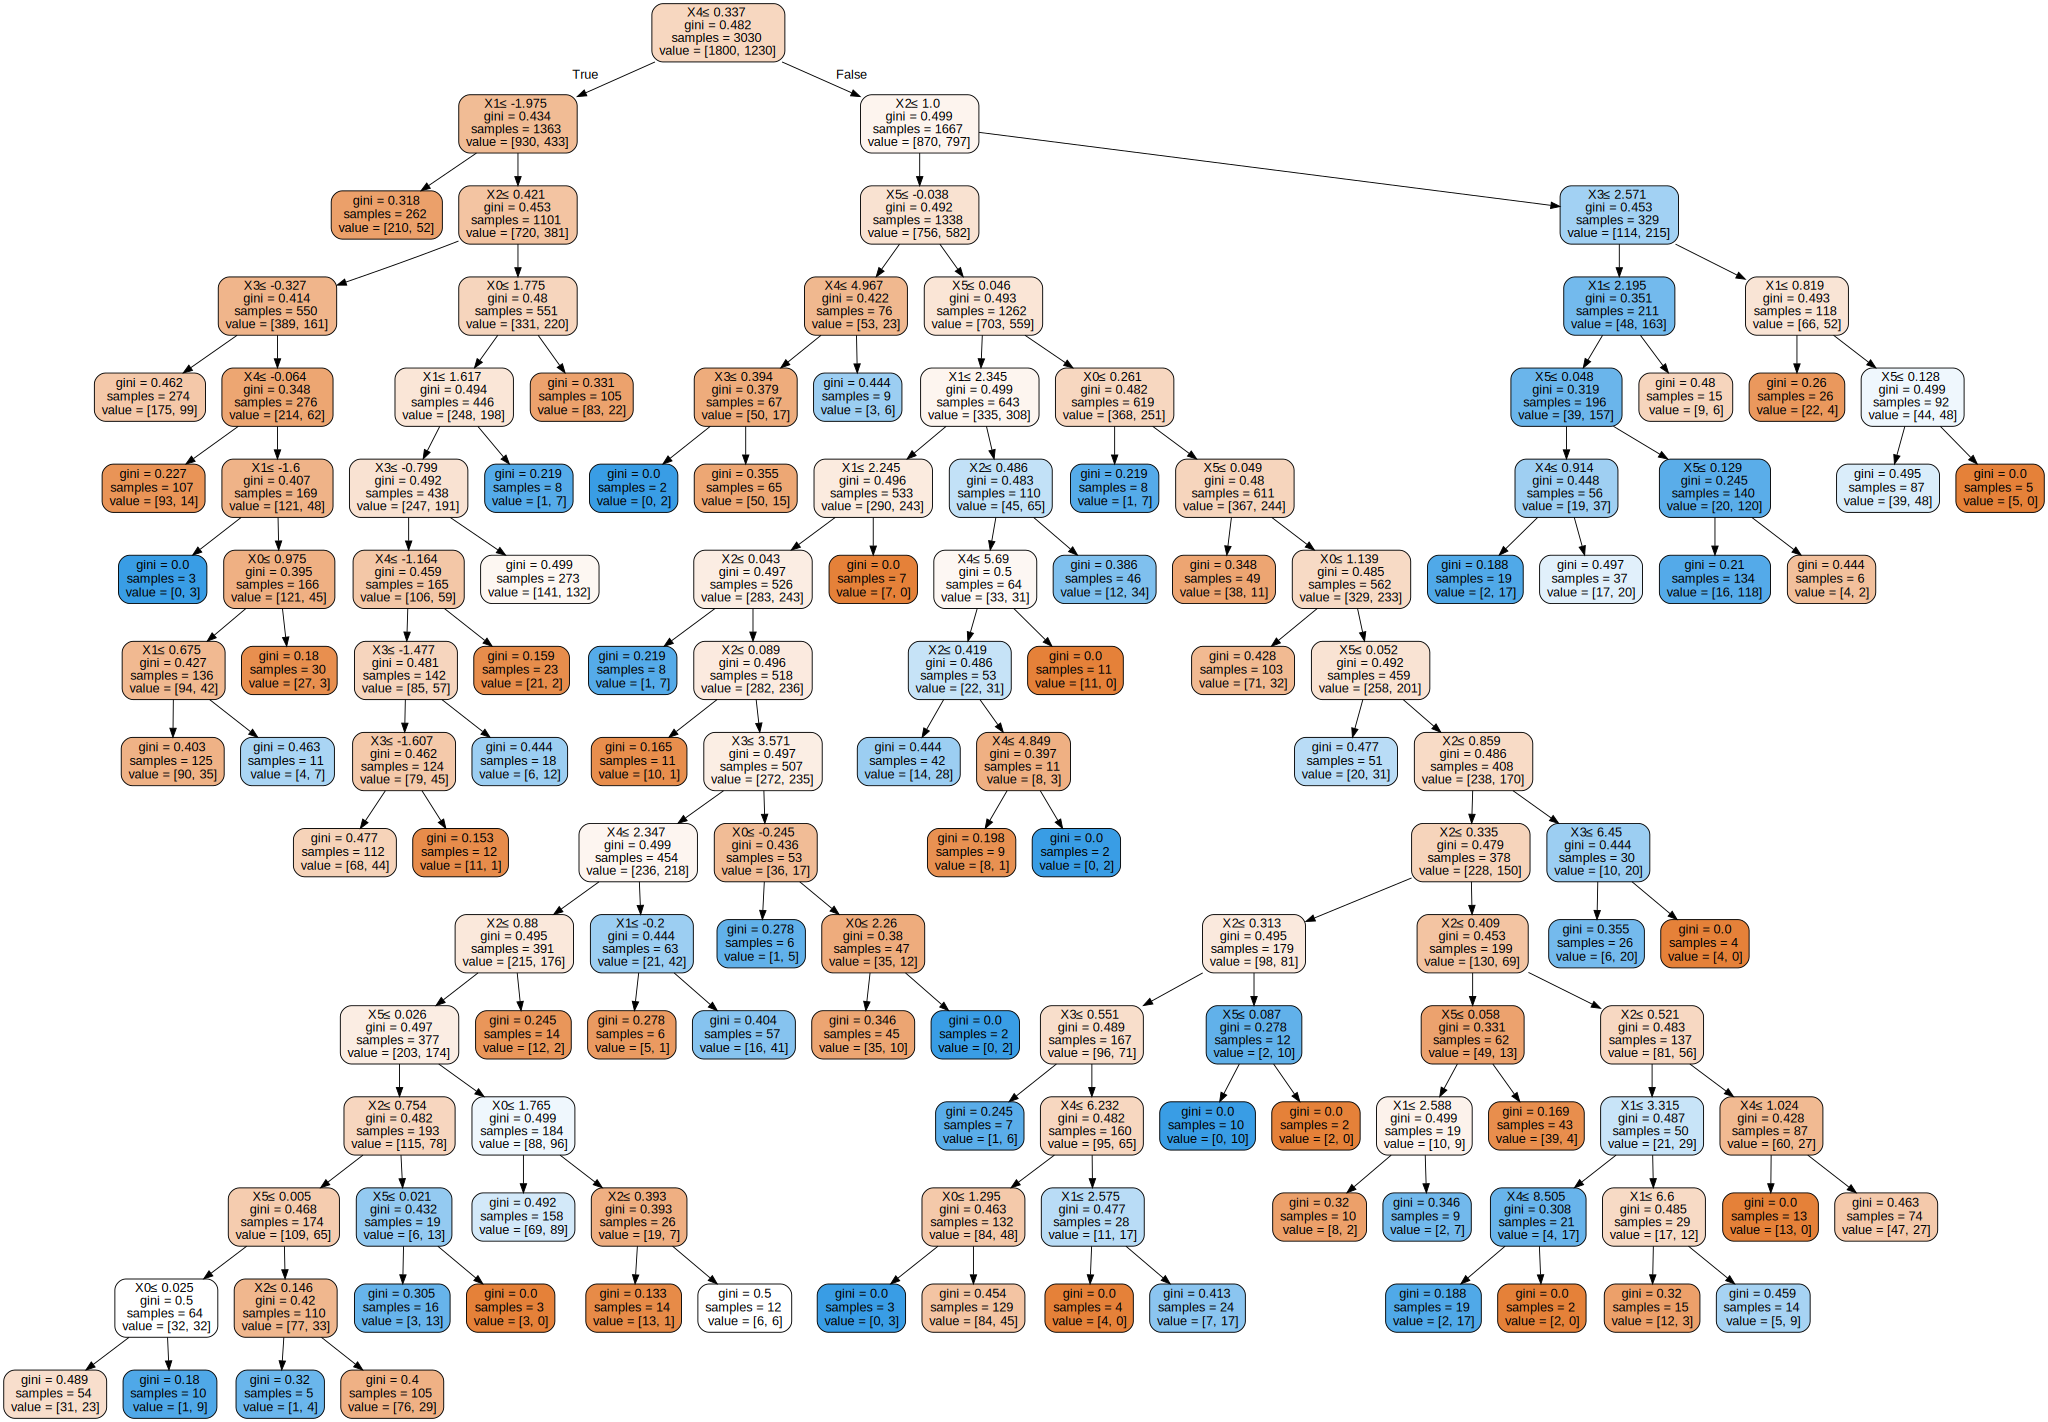

In [38]:
dot_data = tree.export_graphviz(DTC_GS.best_estimator_, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [39]:
print('The parameters combination that would give best accuracy is : ')
print(DTC_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'criterion': 'gini', 'max_depth': 15, 'max_leaf_nodes': 70}


In [40]:
resultsDF = resultsDF.sort_values(by = ["Precision"], ascending = False)
print("Ranked by Precision")
resultsDF

Ranked by Precision


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM NON Linear RUN 1 percentile=5 With Scoring method precision :,0.804491,0.501684,0.381845,0.833333,1.000000
Decision Tree Classifier RUN 1 percentile=5 With Scoring method accuracy,0.714330,0.568825,0.513412,0.626733,0.630607
Decision Tree Classifier RUN 2 percentile=10 With Scoring method accuracy,0.701110,0.564859,0.510951,0.626073,0.631926
Decision Tree Classifier RUN 1 percentile=10 With Scoring method precision,0.697838,0.554101,0.493001,0.776190,0.777778
Decision Tree Classifier RUN 2 percentile=5 With Scoring method precision,0.687941,0.566834,0.513712,0.694805,0.767123
Decision Tree Classifier RUN 3 percentile=5 With Scoring method precision,0.674234,0.576225,0.541532,0.664773,0.714286
Decision Tree Classifier RUN 2 percentile=5 With Scoring method accuracy,0.667319,0.560746,0.511598,0.632673,0.627968
Decision Tree Classifier RUN 1 percentile=10 With Scoring method accuracy,0.655093,0.542862,0.483209,0.626733,0.629288
Decision Tree Classifier RUN 1 percentile=5 With Scoring method precision,0.654875,0.555934,0.508340,0.716172,0.684932


In [41]:
resultsDF = resultsDF.sort_values(by = ["Recall"], ascending = False)
print("Ranked by Recall")
resultsDF

Ranked by Recall


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM NON Linear RUN 1 percentile=5 With Scoring method recall :,0.558047,1.000000,0.716342,0.000000,0.000000
SVM NON Linear RUN 1 percentile=10 With Scoring method f1 :,0.572559,1.000000,0.728188,0.003249,0.000000
SVM NON Linear RUN 1 percentile=10 With Scoring method accuracy :,0.612137,1.000000,0.759411,0.585479,0.612137
SVM NON Linear RUN 1 percentile=5 With Scoring method accuracy :,0.593668,1.000000,0.745033,0.589109,0.593668
SVM NON Linear RUN 1 percentile=1 With Scoring method f1 :,0.593668,1.000000,0.745033,0.000000,0.000000
SVM NON Linear RUN 1 percentile=5 With Scoring method recall :,0.597625,1.000000,0.748142,0.002404,0.000000
SVM NON Linear RUN 1 percentile=10 With Scoring method recall :,0.598945,1.000000,0.749175,0.003203,0.000000
Gaussian Naive Bayes RUN 3 percentile=5 With Scoring method recall,0.594030,0.595926,0.586379,0.649393,0.650943
KNN RUN 2 percentile=10 With Scoring method precision,0.627008,0.594375,0.589870,0.617406,0.586207


In [42]:
resultsDF = resultsDF.sort_values(by = ["Fscore"], ascending = False)
print("Ranked by F Measure")
resultsDF

Ranked by F Measure


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM NON Linear RUN 1 percentile=10 With Scoring method accuracy :,0.612137,1.000000,0.759411,0.585479,0.612137
SVM NON Linear RUN 1 percentile=10 With Scoring method recall :,0.598945,1.000000,0.749175,0.003203,0.000000
SVM NON Linear RUN 1 percentile=5 With Scoring method recall :,0.597625,1.000000,0.748142,0.002404,0.000000
SVM NON Linear RUN 1 percentile=5 With Scoring method accuracy :,0.593668,1.000000,0.745033,0.589109,0.593668
SVM NON Linear RUN 1 percentile=1 With Scoring method f1 :,0.593668,1.000000,0.745033,0.000000,0.000000
SVM NON Linear RUN 1 percentile=10 With Scoring method f1 :,0.572559,1.000000,0.728188,0.003249,0.000000
SVM NON Linear RUN 1 percentile=5 With Scoring method recall :,0.558047,1.000000,0.716342,0.000000,0.000000
Decision Tree Classifier RUN 2 percentile=10 With Scoring method f1,0.599144,0.593394,0.594641,0.590628,0.480734
KNN RUN 2 percentile=10 With Scoring method precision,0.627008,0.594375,0.589870,0.617406,0.586207


In [43]:
resultsDF = resultsDF.sort_values(by = ["Train score"], ascending = False)
print("Ranked by Train score")
resultsDF

Ranked by Train score


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM NON Linear RUN 1 percentile=10 With Scoring method precision :,0.545635,0.500497,0.374468,1.000000,0.500000
Gaussian Naive Bayes RUN 3 percentile=10 With Scoring method recall,0.593009,0.552693,0.451944,0.896800,0.900990
Gaussian Naive Bayes RUN 2 percentile=10 With Scoring method recall,0.546979,0.527423,0.422836,0.895949,0.867347
Gaussian Naive Bayes RUN 1 percentile=10 With Scoring method recall,0.576694,0.548826,0.465112,0.872888,0.867742
SVM NON Linear RUN 1 percentile=5 With Scoring method precision :,0.804491,0.501684,0.381845,0.833333,1.000000
Gaussian Naive Bayes RUN 2 percentile=5 With Scoring method recall,0.565882,0.553685,0.488171,0.798573,0.804795
Decision Tree Classifier RUN 1 percentile=10 With Scoring method precision,0.697838,0.554101,0.493001,0.776190,0.777778
Decision Tree Classifier RUN 2 percentile=10 With Scoring method precision,0.630370,0.531335,0.445478,0.770563,0.687500
Gaussian Naive Bayes RUN 1 percentile=5 With Scoring method recall,0.562815,0.552858,0.498361,0.767572,0.784053


In [44]:
resultsDF = resultsDF.sort_values(by = ["Test score"], ascending = False)
print("Ranked by Test score")
resultsDF

Ranked by Test score


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVM NON Linear RUN 1 percentile=5 With Scoring method precision :,0.804491,0.501684,0.381845,0.833333,1.000000
Gaussian Naive Bayes RUN 3 percentile=10 With Scoring method recall,0.593009,0.552693,0.451944,0.896800,0.900990
Gaussian Naive Bayes RUN 1 percentile=10 With Scoring method recall,0.576694,0.548826,0.465112,0.872888,0.867742
Gaussian Naive Bayes RUN 2 percentile=10 With Scoring method recall,0.546979,0.527423,0.422836,0.895949,0.867347
Gaussian Naive Bayes RUN 2 percentile=5 With Scoring method recall,0.565882,0.553685,0.488171,0.798573,0.804795
Gaussian Naive Bayes RUN 1 percentile=5 With Scoring method recall,0.562815,0.552858,0.498361,0.767572,0.784053
Decision Tree Classifier RUN 1 percentile=10 With Scoring method precision,0.697838,0.554101,0.493001,0.776190,0.777778
Decision Tree Classifier RUN 2 percentile=5 With Scoring method precision,0.687941,0.566834,0.513712,0.694805,0.767123
Decision Tree Classifier RUN 3 percentile=5 With Scoring method precision,0.674234,0.576225,0.541532,0.664773,0.714286
